# Programming Exercise 2: Logistic Regression
# 2 Regularized logistic regression
## 2.1 Visualizing the data

In [1]:
import csv

xs = []
ys = []
with open('../matlab/ex2data2.txt') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        assert len(row) == 3
        xs.append(map(float, row[:-1]))
        ys.append(int(row[-1]))

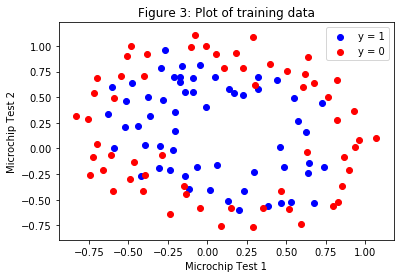

In [2]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

X_ = np.array(xs)
y_ = np.array(ys)
plt.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], color='b', label='y = 1')
plt.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], color='r', label='y = 0')
plt.title('Figure 3: Plot of training data')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

## 2.2 Feature mapping
$map\_feature([x_1, x_2]) = [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3,\ldots,x_1 x_2^5, x_2^6]^T$

In [3]:
def map_feature(X, degree=6):
    m, n = X.shape
    assert n == 2
    x1 = X[:, 0]
    x2 = X[:, 1]
    out = [np.ones((m, 1))]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append(x1**(i - j) * x2**j)
    return np.column_stack(out)

print map_feature(np.array([[-1, 1], [1, 2]]), degree=2)

[[ 1. -1.  1.  1. -1.  1.]
 [ 1.  1.  2.  1.  2.  4.]]


## 2.3 Cost function and gradient
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)} \log h_\theta(x^{(i)}) - (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) ] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$

$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_0^{(i)}$

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \theta_j \quad (j > 0)$

In [4]:
def sigmoid(z):
    ### YOUR CODE HERE ###


    ######################


def cost_function(theta, X, y, lambda_):
    m, _ = X.shape
    J = 0
    grad = np.zeros(theta.shape)
    ### YOUR CODE HERE ###



    ######################
    return J, grad

In [5]:
m = len(ys)
X = map_feature(np.array(xs))
_, n = X.shape
y = np.array([ys]).T
theta = np.zeros((n, 1))

J, grad = cost_function(theta, X, y, 0)
print J
print grad[:5]

0.69314718056
[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]


### 2.3.1 Learning parameters using fminunc
cf. https://docs.scipy.org/doc/scipy-0.10.0/reference/tutorial/optimize.html

In [6]:
from scipy.optimize import fmin_bfgs  # It seems fmin_bfgs does not accept column vectors.

### Note that this is inefficient! ###
def cost(theta):
    J, grad = cost_function(np.array([theta]).T, X, y, lambda_)
    return J

def gradient(theta):
    J, grad = cost_function(np.array([theta]).T, X, y, lambda_)
    return grad.T[0]

lambda_ = 1
theta = fmin_bfgs(cost, np.zeros(n), fprime=gradient)
theta = np.array([theta]).T
print theta[:5]

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
[[ 1.27268739]
 [ 0.62557016]
 [ 1.1809665 ]
 [-2.01919822]
 [-0.91761468]]


## 2.4 Plotting the decision boundary

In [7]:
def predict(theta, X):
    return sigmoid(np.dot(X, theta))

xs1 = np.arange(-1, 1.5, 0.01)
xs2 = np.arange(-0.8, 1.2, 0.01)
x1_grid, x2_grid = np.meshgrid(xs1, xs2)
n1 = len(xs1)
n2 = len(xs2)
assert x1_grid.shape == (n2, n1)
assert x2_grid.shape == (n2, n1)
X_grid = np.column_stack((np.reshape(x1_grid, (n1 * n2, 1)),
                          np.reshape(x2_grid, (n1 * n2, 1))))
probs = predict(theta, map_feature(X_grid))
probs = np.reshape(probs, (n2, n1))

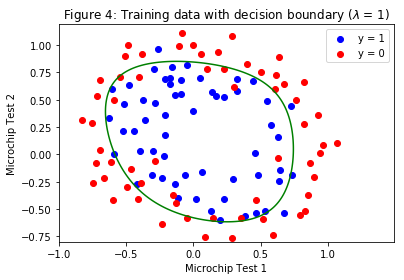

In [8]:
plt.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], color='b', label='y = 1')
plt.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], color='r', label='y = 0')
plt.title(r'Figure 4: Training data with decision boundary ($\lambda$ = %d)' % lambda_)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

CS = plt.contour(x1_grid, x2_grid, probs, levels=[0.5], colors='g')

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


/Users/nakano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


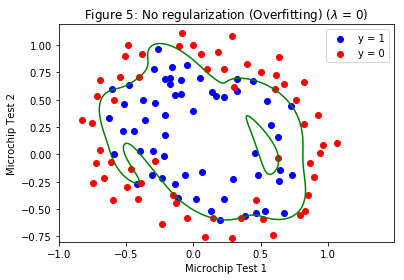

In [9]:
lambda_ = 0
theta = fmin_bfgs(cost, np.zeros(n), fprime=gradient)
theta = np.array([theta]).T
probs = predict(theta, map_feature(X_grid))
probs = np.reshape(probs, (n2, n1))

plt.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], color='b', label='y = 1')
plt.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], color='r', label='y = 0')
plt.title(r'Figure 5: No regularization (Overfitting) ($\lambda$ = %d)' % lambda_)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

CS = plt.contour(x1_grid, x2_grid, probs, levels=[0.5], colors='g')

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


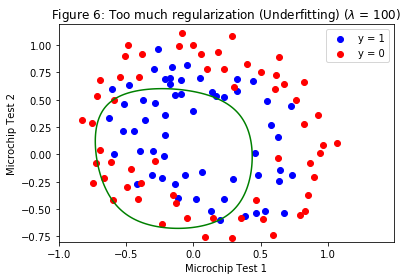

In [10]:
lambda_ = 100
theta = fmin_bfgs(cost, np.zeros(n), fprime=gradient)
theta = np.array([theta]).T
probs = predict(theta, map_feature(X_grid))
probs = np.reshape(probs, (n2, n1))

plt.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], color='b', label='y = 1')
plt.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], color='r', label='y = 0')
plt.title(r'Figure 6: Too much regularization (Underfitting) ($\lambda$ = %d)' % lambda_)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

CS = plt.contour(x1_grid, x2_grid, probs, levels=[0.5], colors='g')